# Statistical Modelling

## Initial Loading
The data from the main file of wrangled data and required libraries is loaded.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import *
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
regular_season_totals = pd.read_csv("regular_season_totals.csv")
play_off_totals = pd.read_csv("play_off_totals.csv")

## Statistical Modelling (Team-Level)

In this component of the project, the top 6 variables representative of team performance selected from the Visualization Analysis component will be applied in a logistic regression model using both the regular season and play-offs totls data to predict whether or not a team wins or loses a basketball game. The data will be split into training and testing sets. 80% of the data will be used as training data to build the model and 20% of the data will be used to assess the performance of the model (testing data). A confusion matrix is constructed to get the accuracy of the model as well.

### Main Classification Models

The main classification models built from the top 6 variables from visualization analysis.

In [2]:
np.random.seed(100)

regular_season_main_predictors_training,regular_season_main_predictors_testing,regular_season_main_WL_training,regular_season_main_WL_testing = train_test_split(regular_season_totals[["fieldGoalsMade","threePointersMade","freeThrowsMade","reboundsTotal","assists","blocks"]],
                                                                                 regular_season_totals["WL"],test_size=0.2)

standard_scaler = StandardScaler()
regular_season_main_predictors_training = standard_scaler.fit_transform(regular_season_main_predictors_training)
regular_season_main_predictors_testing = standard_scaler.transform(regular_season_main_predictors_testing)

regular_season_main_classification_model = LogisticRegression()

regular_season_main_classification_model.fit(regular_season_main_predictors_training,regular_season_main_WL_training)

regular_season_main_classification_model_predictions = regular_season_main_classification_model.predict(regular_season_main_predictors_testing)

regular_season_main_classification_model_accuracy = accuracy_score(regular_season_main_WL_testing,regular_season_main_classification_model_predictions)

regular_season_main_classification_model_confusion_matrix = confusion_matrix(regular_season_main_WL_testing,regular_season_main_classification_model_predictions)

regular_season_main_classification_model_accuracy

0.7225390156062425

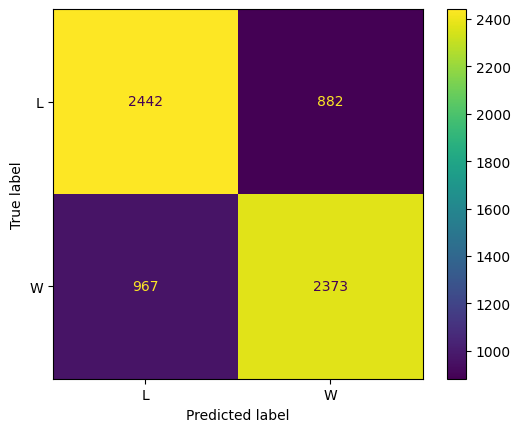

In [3]:
regular_season_main_classification_model_confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=regular_season_main_classification_model_confusion_matrix,display_labels=regular_season_main_classification_model.classes_)
regular_season_main_classification_model_confusion_matrix_display.plot()
plt.show()

The model using regular season totals provides approximately 72.25% accuracy using the top 6 variables selected.

<br>

In [4]:
np.random.seed(100)

play_offs_main_predictors_training,play_offs_main_predictors_testing,play_offs_main_WL_training,play_offs_main_WL_testing = train_test_split(play_off_totals[["fieldGoalsMade","threePointersMade","freeThrowsMade","reboundsTotal","assists","blocks"]],
                                                                                 play_off_totals["WL"],test_size=0.2)

standard_scaler = StandardScaler()
play_offs_main_predictors_training = standard_scaler.fit_transform(play_offs_main_predictors_training)
play_offs_main_predictors_testing = standard_scaler.transform(play_offs_main_predictors_testing)

play_offs_main_classification_model = LogisticRegression()

play_offs_main_classification_model.fit(play_offs_main_predictors_training,play_offs_main_WL_training)

play_offs_main_classification_model_predictions = play_offs_main_classification_model.predict(play_offs_main_predictors_testing)

play_offs_main_classification_model_accuracy = accuracy_score(play_offs_main_WL_testing,play_offs_main_classification_model_predictions)

play_offs_main_classification_model_confusion_matrix = confusion_matrix(play_offs_main_WL_testing,play_offs_main_classification_model_predictions)

play_offs_main_classification_model_accuracy

0.718816067653277

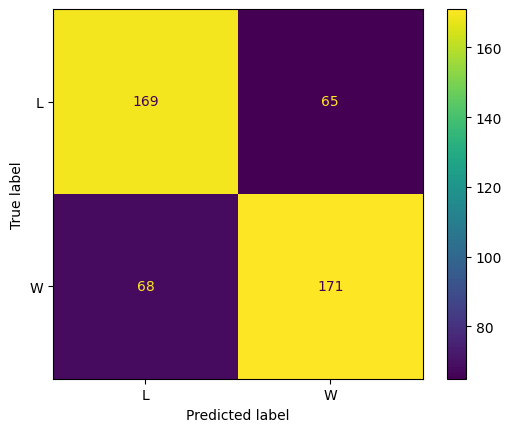

In [5]:
play_offs_main_classification_model_confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=play_offs_main_classification_model_confusion_matrix,display_labels=play_offs_main_classification_model.classes_)
play_offs_main_classification_model_confusion_matrix_display.plot()
plt.show()

The model using play-off totals provides approximately 71.88% accuracy using the top 6 variables selected, similar to the model using regular season totals.

<br>

### Comparison with Other Models

To see how well the model using the top 6 variables is performing, it is compared to a model using the bottom 6 variables and a model using all variables.

In [6]:
np.random.seed(100)

regular_season_bottom_predictors_training,regular_season_bottom_predictors_testing,regular_season_bottom_WL_training,regular_season_bottom_WL_testing = train_test_split(regular_season_totals[["steals","foulsPersonal","turnovers","fieldGoalsAttempted","threePointersAttempted","freeThrowsAttempted"]],
                                                                                 regular_season_totals["WL"],test_size=0.2)

standard_scaler = StandardScaler()
regular_season_bottom_predictors_training = standard_scaler.fit_transform(regular_season_bottom_predictors_training)
regular_season_bottom_predictors_testing = standard_scaler.transform(regular_season_bottom_predictors_testing)

regular_season_bottom_classification_model = LogisticRegression()

regular_season_bottom_classification_model.fit(regular_season_bottom_predictors_training,regular_season_bottom_WL_training)

regular_season_bottom_classification_model_predictions = regular_season_bottom_classification_model.predict(regular_season_bottom_predictors_testing)

regular_season_bottom_classification_model_accuracy = accuracy_score(regular_season_bottom_WL_testing,regular_season_bottom_classification_model_predictions)

regular_season_bottom_classification_model_confusion_matrix = confusion_matrix(regular_season_bottom_WL_testing,regular_season_bottom_classification_model_predictions)

regular_season_bottom_classification_model_accuracy

0.5975390156062425

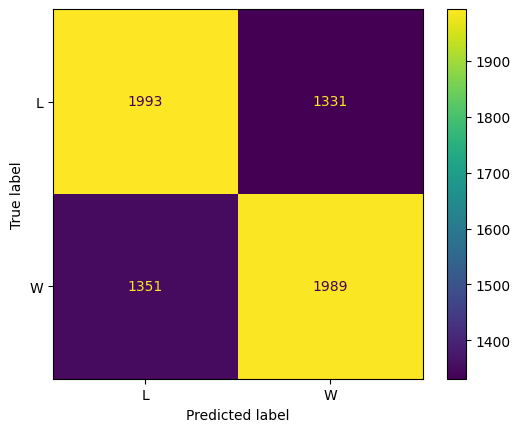

In [7]:
regular_season_bottom_classification_model_confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=regular_season_bottom_classification_model_confusion_matrix,display_labels=regular_season_bottom_classification_model.classes_)
regular_season_bottom_classification_model_confusion_matrix_display.plot()
plt.show()

Using the bottom 6 variables, an accuracy of only approximately 59.75% is achieved using regular season totals.

<br>

In [8]:
np.random.seed(100)

play_offs_bottom_predictors_training,play_offs_bottom_predictors_testing,play_offs_bottom_WL_training,play_offs_bottom_WL_testing = train_test_split(play_off_totals[["steals","foulsPersonal","turnovers","fieldGoalsAttempted","threePointersAttempted","freeThrowsAttempted"]],
                                                                                 play_off_totals["WL"],test_size=0.2)

standard_scaler = StandardScaler()
play_offs_bottom_predictors_training = standard_scaler.fit_transform(play_offs_bottom_predictors_training)
play_offs_bottom_predictors_testing = standard_scaler.transform(play_offs_bottom_predictors_testing)

play_offs_bottom_classification_model = LogisticRegression()

play_offs_bottom_classification_model.fit(play_offs_bottom_predictors_training,play_offs_bottom_WL_training)

play_offs_bottom_classification_model_predictions = play_offs_bottom_classification_model.predict(play_offs_bottom_predictors_testing)

play_offs_bottom_classification_model_accuracy = accuracy_score(play_offs_bottom_WL_testing,play_offs_bottom_classification_model_predictions)

play_offs_bottom_classification_model_confusion_matrix = confusion_matrix(play_offs_bottom_WL_testing,play_offs_bottom_classification_model_predictions)

play_offs_bottom_classification_model_accuracy

0.5813953488372093

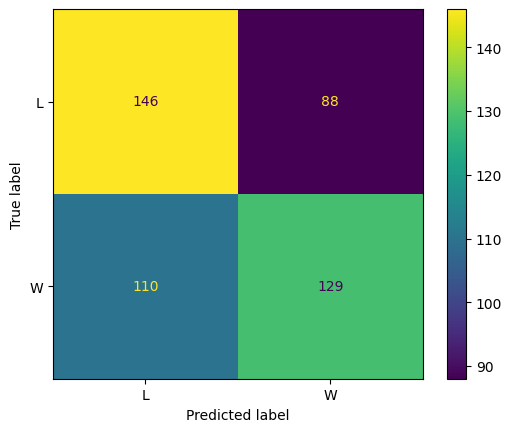

In [9]:
play_offs_bottom_classification_model_confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=play_offs_bottom_classification_model_confusion_matrix,display_labels=play_offs_bottom_classification_model.classes_)
play_offs_bottom_classification_model_confusion_matrix_display.plot()
plt.show()

Using the bottom 6 variables, an accuracy of only approximately 58.14% is achieved using play-off totals.

<br>

In [10]:
np.random.seed(100)

regular_season_all_predictors_training,regular_season_all_predictors_testing,regular_season_all_WL_training,regular_season_all_WL_testing = train_test_split(regular_season_totals[["fieldGoalsMade","threePointersMade","freeThrowsMade","reboundsTotal","assists","blocks","steals","foulsPersonal","turnovers","fieldGoalsAttempted","threePointersAttempted","freeThrowsAttempted"]],
                                                                                 regular_season_totals["WL"],test_size=0.2)

standard_scaler = StandardScaler()
regular_season_all_predictors_training = standard_scaler.fit_transform(regular_season_all_predictors_training)
regular_season_all_predictors_testing = standard_scaler.transform(regular_season_all_predictors_testing)

regular_season_all_classification_model = LogisticRegression()

regular_season_all_classification_model.fit(regular_season_all_predictors_training,regular_season_all_WL_training)

regular_season_all_classification_model_predictions = regular_season_all_classification_model.predict(regular_season_all_predictors_testing)

regular_season_all_classification_model_accuracy = accuracy_score(regular_season_all_WL_testing,regular_season_all_classification_model_predictions)

regular_season_all_classification_model_confusion_matrix = confusion_matrix(regular_season_all_WL_testing,regular_season_all_classification_model_predictions)

regular_season_all_classification_model_accuracy

0.8463385354141657

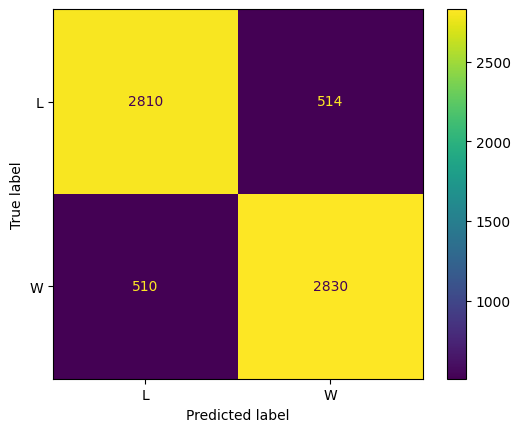

In [11]:
regular_season_all_classification_model_confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=regular_season_all_classification_model_confusion_matrix,display_labels=regular_season_all_classification_model.classes_)
regular_season_all_classification_model_confusion_matrix_display.plot()
plt.show()

Using all variables analyzed, an accuracy of approximately 84.63% is achieved using regular season totals.

<br>

In [12]:
np.random.seed(100)

play_offs_all_predictors_training,play_offs_all_predictors_testing,play_offs_all_WL_training,play_offs_all_WL_testing = train_test_split(play_off_totals[["fieldGoalsMade","threePointersMade","freeThrowsMade","reboundsTotal","assists","blocks","steals","foulsPersonal","turnovers","fieldGoalsAttempted","threePointersAttempted","freeThrowsAttempted","steals","foulsPersonal","turnovers","fieldGoalsAttempted","threePointersAttempted","freeThrowsAttempted"]],
                                                                                 play_off_totals["WL"],test_size=0.2)

standard_scaler = StandardScaler()
play_offs_all_predictors_training = standard_scaler.fit_transform(play_offs_all_predictors_training)
play_offs_all_predictors_testing = standard_scaler.transform(play_offs_all_predictors_testing)

play_offs_all_classification_model = LogisticRegression()

play_offs_all_classification_model.fit(play_offs_all_predictors_training,play_offs_all_WL_training)

play_offs_all_classification_model_predictions = play_offs_all_classification_model.predict(play_offs_all_predictors_testing)

play_offs_all_classification_model_accuracy = accuracy_score(play_offs_all_WL_testing,play_offs_all_classification_model_predictions)

play_offs_all_classification_model_confusion_matrix = confusion_matrix(play_offs_all_WL_testing,play_offs_all_classification_model_predictions)

play_offs_all_classification_model_accuracy

0.8414376321353065

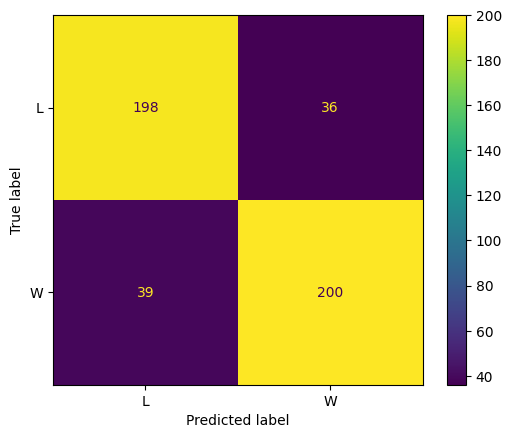

In [13]:
play_offs_all_classification_model_confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=play_offs_all_classification_model_confusion_matrix,display_labels=play_offs_all_classification_model.classes_)
play_offs_all_classification_model_confusion_matrix_display.plot()
plt.show()

Using all variables analyzed, an accuracy of approximately 84.63% is achieved using play-off totals.

<br>

### Conclusion

In conclusion, the accuracy from using the top 6 variables as predictors for game outcomes produced relatively good accuracy. When using all variables as predictors, the high accuracy is expected because the models have access to more information about basketball performance when making predictions, leading to more accurate predictions. Compared to the full-variable models, the models with the top 6 variables is approximately 12.49% less accurate, whereas the model using the bottom 6 variables is approximately 25.39% less accurate, nearly double the loss in accuracy relative to the top 6 variable model. As such, the classification model constructed from using the top 6 variables performs well, especially when comparing to the model using the bottom 6 variables. These results may also suggest that the visualization analysis previously done was effective.

In [14]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# -----------------------------
# 1. Select predictors & target
# -----------------------------
predictors = ["fieldGoalsMade"+"reboundsTotal"+"assists"+freeThrowsMade+threePointersMade+blocks"fieldGoalsAttempted","freeThrowsAttempted","threePointersAttempted","steals","foulsPersonal","turnovers"]
X = regular_season_totals[predictors]
y = regular_season_totals["WL"]  # "W" / "L"

# Map target to numeric
y_numeric = y.map({"L": 0, "W": 1}).astype(int)

# -----------------------------
# 2. Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.2, stratify=y_numeric, random_state=100
)

# -----------------------------
# 3. Scale predictors
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 4. Fit logistic regression (liblinear)
# -----------------------------
model = LogisticRegression(solver='liblinear', random_state=100)
model.fit(X_train_scaled, y_train)

# -----------------------------
# 5. Predict on test set
# -----------------------------
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # probability of "W"
y_pred_class = (y_pred_prob >= 0.5).astype(int)

# Convert back to "W"/"L"
y_pred_labels = pd.Series(y_pred_class).map({0: "L", 1: "W"})

# -----------------------------
# 6. Accuracy & confusion matrix
# -----------------------------
accuracy = metrics.accuracy_score(y_test, y_pred_class)
conf_matrix = metrics.confusion_matrix(y_test, y_pred_class)

print(f"Accuracy: {accuracy*100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

SyntaxError: invalid syntax (2440359795.py, line 10)

In [ ]:
#predictors = regular_season_totals[["fieldGoalsAttempted","freeThrowsAttempted","threePointersAttempted","steals","foulsPersonal","turnovers","fieldGoalsMade","reboundsTotal","assists","freeThrowsMade","threePointersMade","blocks"]]
predictors = regular_season_totals[["fieldGoalsAttempted","freeThrowsAttempted","threePointersAttempted","steals","foulsPersonal","turnovers"]]

WL = regular_season_totals["WL"]

predictors_training,predictors_testing,WL_training,WL_testing = train_test_split(predictors,WL,test_size=0.2,stratify=WL,random_state=100)
model = LogisticRegression(solver="sag",random_state=100)
model.fit(predictors_training,WL_training)

predictions=model.predict(predictors_testing)
accuracy=metrics.accuracy_score(WL_testing,predictions)
print(accuracy)

0.8385354141656662


33316